# The N Queens Problem
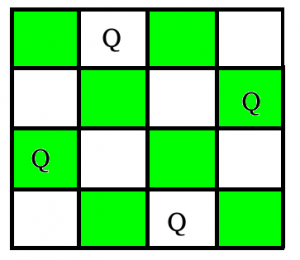  
  
You are given an N×N chessboard, and each cell of the board has an associated weight. Your task is to find a valid placement of N queens such that the total weight of the queens is maximized, and no two queens threaten each other  
  
In the traditional N-Queen Problem, the goal is to place N queens on an N×N chessboard in such a way that no two queens threaten each other. In this variation, we introduce weights to the queens and aim to find a placement that maximizes the total weight of the queens while satisfying the constraint of non-threatening positions

## Constraints:
1. There should be exactly one queen on each row and each column
2. No to queens should be placed on the same diagonal
3. The placement of the queens should maximise the total weight

## Representation
Permutation-based representation. Each permutation represents the column position of the queen on each row  
  
ex. for n = 4, \[2, 4, 1, 3\] represents queens placed on the cells (1,2), (2,4), (3,1), (4, 3)  
  
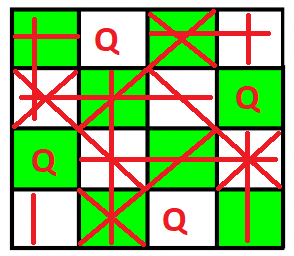

## Steps:  
1. Initialisation: Generate a random collection of permutations
2. Fitness evaluation: Evaluate for each individual of population. Penalize invalid positions
3. Selection: Select a subset of individuals based on their fitness using appropriate selection techniques
4. Crossover: Perform crossover of the selected permutations and create new offspring
5. Mutation: Introduce random changes in the offspring to maintain diversity
6. Evaluate the fitness of the new population
7. Form the new population: Select the surviving individuals based on score
8. Repeat 3 -> 7 until good enough solution found or maximum number of generations reached
9. Output the best performing individual of the last generation

### Note:  
The fitness function used in this problem should calculate the total weight of the queens based on the positions specified by the permutation. Additionally, the fitness function should penalize solutions that violate the non-threatening constraint by assigning a lower fitness score to such permutations.

In [1]:
from typing import List
from random import random, shuffle, choice, randint
import matplotlib.pyplot as plt
from math import ceil

In [2]:
def individual(length: int) -> List[int]:
    ins = list(range(1, length + 1))
    shuffle(ins)
    return ins

In [3]:
for i in range(3):
    print(individual(2 * (i + 1)))

[1, 2]
[3, 1, 2, 4]
[4, 3, 5, 1, 6, 2]


In [4]:
def population(population_cap: int, individual_size: int) -> List[List[int]]:
    return [individual(individual_size) for _ in range(population_cap)]

In [5]:
print(population(10, 4))

[[1, 3, 2, 4], [3, 4, 1, 2], [3, 2, 4, 1], [4, 3, 1, 2], [3, 1, 2, 4], [2, 3, 1, 4], [4, 3, 2, 1], [2, 4, 3, 1], [1, 4, 2, 3], [4, 3, 1, 2]]


In [6]:
def diagonals_coincide(row: int, col: int, individual_slice: List[int]) -> bool:
    for i, j in enumerate(individual_slice):
        if abs(row - i - 1) == abs(col - j):
            return True
    return False

In [7]:
assert(diagonals_coincide(3, 3, [1, 2]))
assert(diagonals_coincide(4, 1, [4, 2, 3]))

In [8]:
def fitness(individual: List[int], weights: List[List[float]]) -> float:
    if len(set(individual)) != len(individual):
        return 0
    total_weight = 0
    for index, column in enumerate(individual):
        row = index + 1
        if diagonals_coincide(row, column, individual[:index]):
            return 0
        total_weight += weights[index][column - 1]
    return total_weight

In [9]:
def mutate(individual: List[int], mutation_probability: float) -> List[int]:
    if mutation_probability <= random():
        return individual
    size = len(individual)
    id1 = randint(0, size - 2)
    id2 = randint(id1 + 1, size - 1)
    interval_half = ceil((id2 - id1) / 2) 
    for i in range(interval_half + 1):
        individual[id1 + i], individual[id2 - i] = individual[id2 - i], individual[id1 + i]
    return individual

In [10]:
def crossover(father: List[int], mother: List[int]) -> [List[int], List[int]]:
    size = len(father)
    assert(len(mother) == size)
    
    cutoff_point_1 = randint(0, size - 2)
    cutoff_point_2 = randint(cutoff_point_1 + 1, size - 1)
    son = [-1] * size
    daughter = [-1] * size
    son[cutoff_point_1: cutoff_point_2 + 1] = father[cutoff_point_1: cutoff_point_2 + 1]
    daughter[cutoff_point_1: cutoff_point_2 + 1] = mother[cutoff_point_1: cutoff_point_2 + 1]
    for i in range(cutoff_point_1, cutoff_point_2 + 1):
        if mother[i] not in son:
            p = i
            while son[p] != -1:
                p = mother.index(father[p])
            son[p] = mother[i]
        
        if father[i] not in daughter:
            p = i
            while daughter[p] != -1:
                p = father.index(mother[p])
            daughter[p] = father[i]
        
    for i in range(size):
        if son[i] == -1:
            son[i] = mother[i]
        if daughter[i] == -1:
            daughter[i] = father[i]        
    return son, daughter

In [11]:
def selection(population: List[List[int]], weights: List[List[float]]) -> [List[int], List[int]]:
    selection_size = int(len(population) ** 0.5)
    selected_parents = sorted([choice(population) for _ in range(selection_size)], key=lambda i: fitness(i,weights), reverse=True)
    return selected_parents[:2]

In [12]:
def generation(population: List[List[int]], mutation_probability: float, weights: [List[List[float]]]) -> List[List[int]]:

    father, mother = selection(population, weights)
    son, daughter = crossover(father, mother)
    son = mutate(son, mutation_probability)
    daughter = mutate(daughter, mutation_probability)
    
    sorted_individuals = sorted([father, mother, son, daughter], key=lambda individual: fitness(individual, weights), reverse=True)
    idf = population.index(father)
    idm = population.index(mother)
    population[idf], population[idm] = sorted_individuals[:2]
    
    return population

In [13]:
def evolutionary_algorithm(population_size: int, iter_count: int, mutation_probability: float, weights: List[List[float]]) -> List[List[int]]:
    everyone = population(population_size, 8)
    bests = []
    for _ in range(iter_count):
        everyone = \
        sorted(\
            generation(everyone,\
                       mutation_probability,\
                       weights),\
            key=lambda i: fitness(i, weights),\
            reverse=True)
        bests.append(everyone[0])
    return bests

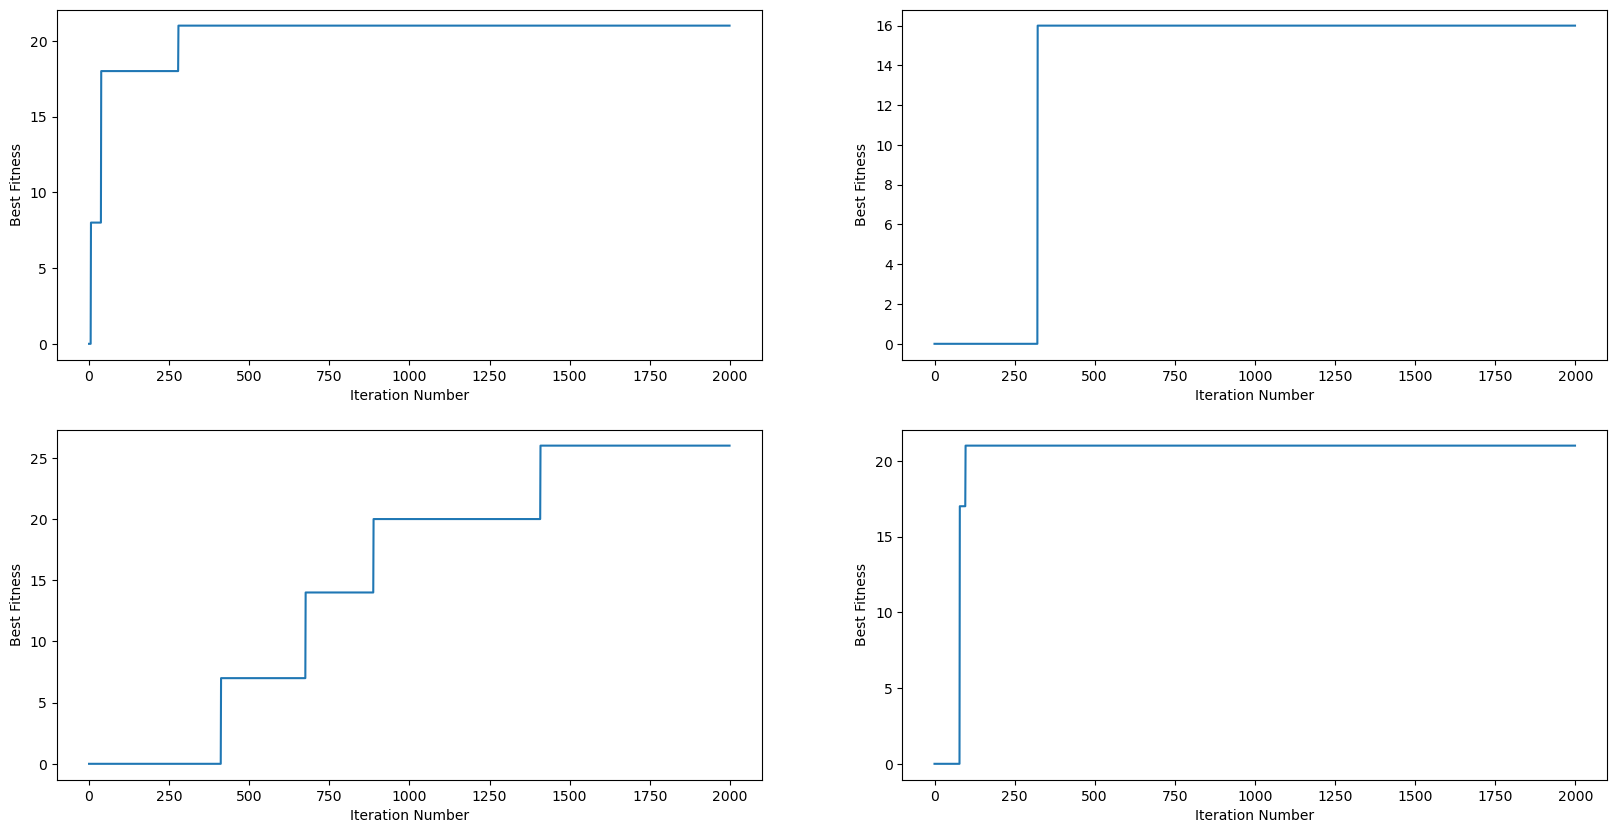

In [14]:
if __name__ == "__main__":
    population_size = 50
    iter_count = 2_000
    mutation_probability = 0.25
    weights = [
        [ 0,  1, -2,  1,  3, -1,  4,  1],
        [ 1,  0,  1,  1,  0,  1,  1,  1],
        [ 1,  1,  0,  5,  7, -8,  1,  8],
        [ 1,  1, -1,  0,  1,  1,  7,  1],
        [ 0,  5,  1,  1,  0,  1,  0, -6],
        [ 9,  1, -5,  1,  1,  0,  3,  0],
        [ 1,  0,  1,  3,  0,  1,  2,  1],
        [ 1, -4,  1,  2,  8, -1,  1,  0]
    ]
    plt.figure(figsize=(20, 10))
    for index in range(4):
        bests = evolutionary_algorithm(population_size, iter_count, mutation_probability, weights)
        X = range(iter_count)
        y = [fitness(bests[i], weights) for i in X]
        plt.subplot(2, 2, index + 1)
        plt.plot(X, y)
        plt.ylabel('Best Fitness')
        plt.xlabel('Iteration Number')
    plt.show()